# 下載網頁
#匯入urlib.request的urlopen模組
#使用urlopen的read('網頁網址').read()讀取網頁
#讀回的網頁内容是html檔按格式

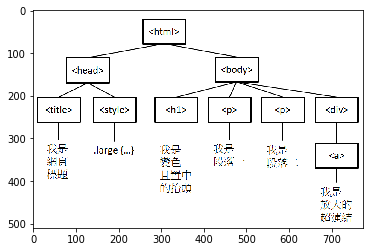

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import skimage.io as skio
img1 = skio.imread('C:/Users/USER/Desktop/夢想的價值/Python/自學/Web scraper.png')
plt.imshow(img1)
plt.show()

In [5]:
# 請讀取網頁http://pythonscraping.com/pages/page1.html 的網頁内容，並將其印出。
from urllib.request import urlopen
html = urlopen('http://pythonscraping.com/pages/page1.html')
print(html.read())

b'<html>\n<head>\n<title>A Useful Page</title>\n</head>\n<body>\n<h1>An Interesting Title</h1>\n<div>\nLorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.\n</div>\n</body>\n</html>\n'


# 處理HTML格式檔案
#安裝 bs4 套件
#切換到Python安裝目錄下的scripts資料夾
#執行 pip install bs4
#匯入BeautifulSoup套件
#from bs4 import BeautifulSoup
#建構一個BeautifulSoup之HTML處理器
#bs = BeautifulSoup('html文字', '格式剖析器代號')


In [7]:
# 請從讀取的網頁http://pythonscraping.com/pages/page1.html 内容中找出<html>, <head>, <title>, <body>, <h1>, <div>等標簽内容。
#from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('http://www.pythonscraping.com/exercises/exercise1.html')
bsObj = BeautifulSoup(html.read(), 'lxml')
print(bsObj.html)
print('-'*50)
print(bsObj.head)
print('-'*50)
print(bsObj.title)
print('-'*50)
print(bsObj.body)
print('-'*50)
print(bsObj.h1)
print('-'*50)
print(bsObj.div)
print('-'*50)

<html>
<head>
<title>A Useful Page</title>
</head>
<body>
<h1>An Interesting Title</h1>
<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
</div>
</body>
</html>
--------------------------------------------------
<head>
<title>A Useful Page</title>
</head>
--------------------------------------------------
<title>A Useful Page</title>
--------------------------------------------------
<body>
<h1>An Interesting Title</h1>
<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exer

# 防錯處理
#處理網頁連接錯誤安裝
#使用try ... except ...偵錯指令
#偵測 HTTPError 錯誤
#處理剖析錯誤
#試圖截取不存在的標簽會囘傳一個None物件,若再試圖用這個None物件截取其他標簽,將傳回AttributeError錯誤.
#使用try ... except ...偵錯指令
#偵測 AttributeError 錯誤

In [8]:
# 請讀取 http://pythonscraping.com/pages/page1.html 的網頁,若有連接錯誤請發出警告訊息。
from urllib.error import HTTPError, URLError
from urllib.request import urlopen
from bs4 import BeautifulSoup
try:
    html2 = urlopen("http://www.pythonscraping.com/exercises/exercise2.html")
except URLError as e:
    print('Errors have happened.')
    print(e)
    #return null, break, or do some other "Plan B"
if html2 is not None:
    #program continues. Note: If you return or break in the
    #exception catch, you do not need to use the "else" statement
    bsObj = BeautifulSoup(html.read(), 'lxml')
    print(bsObj.html)
    print('-'*50)
    print(bsObj.head)
    print('-'*50)
    print(bsObj.title)
    print('-'*50)
    print(bsObj.body)
    print('-'*50)
    print(bsObj.h1)
    print('-'*50)
    print(bsObj.div)
    print('-'*50)

Errors have happened.
HTTP Error 404: Not Found


NameError: name 'html2' is not defined

In [9]:
# 請從讀取的網頁http://pythonscraping.com/pages/page1.html 内容中找出(1) <div>, (2)包含在<div>標簽下的<h1>, 及(3) <div>標簽下的<h2>標簽内的<img>標簽内容,若指定之標簽不存在或不正確是時請發出警告。
from urllib.error import HTTPError
try:
    html = urlopen("http://www.pythonscraping.com/exercises/exercise1.html")
except HTTPError as e:
    print('Errors have happened.')
    print(e)
    #return null, break, or do some other "Plan B"
if html is not None:
    #program continues. Note: If you return or break in the
    #exception catch, you do not need to use the "else" statement
    bsObj = BeautifulSoup(html.read(), 'lxml')
    try:
        print('Div-----')
        content1 = bsObj.div
        print(content1)
        print('Div.H1-----')
        content2 = bsObj.div.h1
        print(content2)
        print('Div.H2.IMG-----')
        content3 = bsObj.div.h2.img
        print(content3)
    except AttributeError as e:
        print('The request tag does not exist in the retrieved html.')

Div-----
<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
</div>
Div.H1-----
None
Div.H2.IMG-----
The request tag does not exist in the retrieved html.


In [10]:
# 請設計一個函數getTag(url, tag)可從指定的url中讀取指定的tag標簽。
from urllib.error import HTTPError

def getTag(url, tag):    
    try:
        html = urlopen(url)
    except HTTPError as e:
        print('Errors have happened.')
        print(e)
        #return null, break, or do some other "Plan B"
    if html is not None:
        #program continues. Note: If you return or break in the
        #exception catch, you do not need to use the "else" statement
        bsObj = BeautifulSoup(html.read(), 'lxml')
        try:
            content1 = bsObj.find_all(tag) # find the html part specified by tag
            print(content1)
        except AttributeError as e:
            print('The request tag does not exist in the retrieved html.')
        if content1 is not None:
            return content1

title = getTag('http://www.pythonscraping.com/exercises/exercise1.html', tag='h1')

[<h1>An Interesting Title</h1>]


# 搜尋HTML指定標簽
#利用BeautifulSoup物件之find(tag, **keywords)指令
#找出第一個標的
#利用BeautifulSoup物件之findAll(tag, **keywords)指令
#找出所有標的

In [11]:
# 請從http://www.pythonscraping.com/pages/warandpeace.html分別找出第一個和所有標注為class=green的<span>標簽内容
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("http://www.pythonscraping.com/pages/warandpeace.html")
bsObj = BeautifulSoup(html.read(), 'lxml')
name = bsObj.find('span', {'class':'green'})
print(name.get_text().replace('\n',' '))
print('-'*80)
nameList = bsObj.findAll("span", {"class":"green"})
for name in nameList:
    print(name.get_text().replace('\n',' '))

Anna Pavlovna Scherer
--------------------------------------------------------------------------------
Anna Pavlovna Scherer
Empress Marya Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron Funke
The prince
Anna Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna Pavlovna
Anna Pavlovna


In [12]:
# 請在http://www.pythonscraping.com/pages/warandpeace.html完成以下任務
# 找出所有<h1>,<h2>,<h3>的標簽内容
# 找出所有文字是the prince的標簽内容
# 找出有指定class='green'的標簽内容
# 找出有指定class='green'和class='red'的<span>標簽内容
# 找出有指定id='text'的標簽内容
#findAll(tag, attributes, recursive, text, limit, keywords)
#find(tag, attributes, recursive, text, keywords)
# hText = bsObj.findAll({"h1","h2","h3"})
# print(hText)
# for ht in hText:
#     print(ht.get_text())
# print('-'*80)
# nameList = bsObj.findAll(text="the prince")
# print(nameList)
# print(len(nameList))
# print('-'*80)
# txtGreen1 = bsObj.findAll(class_="green")
# print(txtGreen1)
# print('*'*40)
# txtGreen2 = bsObj.findAll('',{'class':'green'})
# print(txtGreen2)
# print('-'*80)
rgList = bsObj.findAll("span", {"class":"green", "class":"red"})
print(rgList)
print('-'*80)
# allText1 = bsObj.findAll(id="text")
# print(allText1)
# print(allText1[0].get_text())
# print('*'*40)
# allText2 = bsObj.findAll("", {"id":"text"})
# print(allText2)
# print('-'*80)

[<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>, <span class="red">If you have nothing better to do, Count [or Prince], and if the
prospect of spending an evening with a poor invalid is not too
terrible, I shall be very charmed to see you tonight between 7 and 10-
Annette Scherer.</span>, <span class="red">Heavens! what a virulent attack!</span>, <span class="red">First of all, dear friend, tell me how you are. Set your friend's
mind at rest,</span>, <span class="red">Can one be well while suffering morally? Can one be calm in times
like these if on

# 漫游HTML樹
#利用bsobj.children
#利用bsobj.descendants
#利用bsobj.next_siblings
#利用bsobj.previous_siblings
#利用bsobj.parent

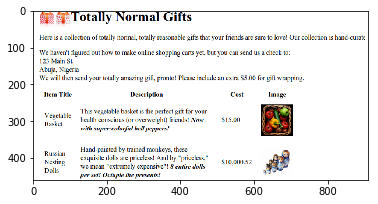

In [13]:
# 請在http://www.pythonscraping.com/pages/page3.html中找出所有商品品項與價格.
img1 = skio.imread('C:/Users/USER/Desktop/夢想的價值/Python/自學/SCRAPER-1.png')
plt.imshow(img1)
plt.show()

In [14]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj = BeautifulSoup(html, "lxml")
gobj = bsObj.findAll(class_='gift')
#print(gobj)
for j, gift in enumerate(gobj):
    #print(j, len(list(gift.children)))
    for col, attr in enumerate(gift.children):
        if col==0:
            print('項目名稱%d：'%(j+1), attr.get_text().replace('\n',''), end=' ')
        if col==2:
            print('價格：', attr.get_text().replace('\n', ''))

項目名稱1： Vegetable Basket 價格： $15.00
項目名稱2： Russian Nesting Dolls 價格： $10,000.52
項目名稱3： Fish Painting 價格： $10,005.00
項目名稱4： Dead Parrot 價格： $0.50
項目名稱5： Mystery Box 價格： $1.50


In [15]:
from urllib.request import urlopen
from bs4 import BeautifulSoup, NavigableString
html = urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj = BeautifulSoup(html, 'lxml')
header = bsObj.find("table",{"id":"giftList"}).tr
print(header)
for i, sibling in enumerate(header.next_siblings): #get all table rows of items
    print(type(sibling))
    if type(sibling)!=NavigableString: #NavigableString are some empty lines between tag elements
        cols = sibling.children
        for col, attr in enumerate(cols):
            if col==0:
                print('項目名稱%d：'%(j+1), attr.get_text().replace('\n',''), end=' ')
            if col==2:
                print('價格：', attr.get_text().replace('\n', ''))

<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
項目名稱5： Vegetable Basket 價格： $15.00
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
項目名稱5： Russian Nesting Dolls 價格： $10,000.52
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
項目名稱5： Fish Painting 價格： $10,005.00
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
項目名稱5： Dead Parrot 價格： $0.50
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
項目名稱5： Mystery Box 價格： $1.50
<class 'bs4.element.NavigableString'>


# 利用正則式搜尋
#可定義與特定規律性字串匹配的樣型，使用前須匯入re套件

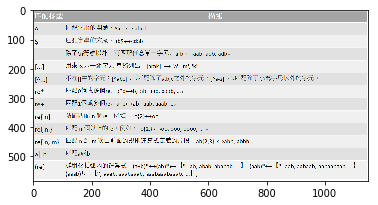

In [19]:
img1 = skio.imread('C:/Users/USER/Desktop/夢想的價值/Python/自學/re.png')
plt.imshow(img1)
plt.show()

In [20]:
# 請在http://www.pythonscraping.com/pages/page3.html中找出所有商品影像連結.

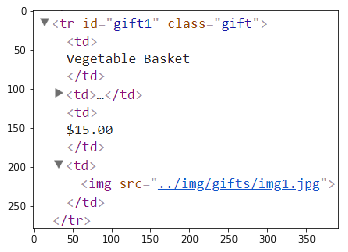

In [22]:
img1 = skio.imread('C:/Users/USER/Desktop/夢想的價值/Python/自學/td-image.png')
plt.imshow(img1)
plt.show()

In [23]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
html = urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj = BeautifulSoup(html, 'lxml')
images = bsObj.findAll("img", {"src":re.compile("\.\.\/img\/gifts/img.*\.jpg")})
for image in images:
    print(image["src"])
print('-'*80)
for image in images:
    print(image.attrs["src"])

../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg
--------------------------------------------------------------------------------
../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


In [24]:
# 請在http://www.pythonscraping.com/pages/page3.html中找出所有標簽包含有id為giftX(其中X代表一個或多個數字)的標簽内容.
cond = lambda tag: 'id' in tag.keys() 
result = bsObj.findAll(id = re.compile('gift[0-9]+[0-9]*'))
print(len(result))
for r in result:
    print('ID=%s 連結=%s'%(r['id'], r.img['src']))

5
ID=gift1 連結=../img/gifts/img1.jpg
ID=gift2 連結=../img/gifts/img2.jpg
ID=gift3 連結=../img/gifts/img3.jpg
ID=gift4 連結=../img/gifts/img4.jpg
ID=gift5 連結=../img/gifts/img6.jpg


In [25]:
# 請從國立東華大學的首頁抓回頭條新聞.
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("http://www.ndhu.edu.tw/bin/home.php")
bsObj = BeautifulSoup(html, 'lxml')
num = 1
for link in bsObj.findAll("tr", {'class':re.compile('row_[1-9]+')}):
    #print(link)
    if link.p is not None:
        print('消息%d：\n%s'%(num, link.p.get_text()))
        num += 1

消息1：
國立東華大學音樂學系日前舉辦「2019東華大學國際鋼琴音樂營」，來自馬來西亞及臺北市、新北市、高雄市及花蓮縣等10個縣市，從國小四年級至國中、高中、大學、研究所等不同年齡層的學員共聚一堂研習。
消息2：
「花蓮國際管樂營」是由國立東華大學音樂系、花蓮管樂發展協會與法國歐洲銅管之聲（Eurocuivres）合作辦理，由東華藝術學院劉惠芝院長、音樂學系沈克恕主任策劃，呂彥輝教授擔任總召與計畫執行。為期1週的暑期營隊，師資包含12位來自法國、英國、委內瑞拉，以及14位臺灣的教授演奏家。近百位從國小四年級到60歲的愛樂者學員，來自美國、越南、新加坡、中國大陸、香港及臺灣各地，是不分年齡與程度的銅管、打擊、木管和豎琴演奏者參與的盛會。學員們除提高個人演奏能力外，更在營隊獲得畢生難忘的音樂學習氛圍與經驗。


# 使用瀏覽器工具找標籖選擇器

In [26]:
# 請從國立東華大學放榜網頁(http://aaexam.ndhu.edu.tw/files/107Ex/107sel0427/034_PassList/pass_034.htm) 抓回資工系的榜單.
from urllib.request import urlopen
from bs4 import BeautifulSoup, NavigableString

url = "http://aaexam.ndhu.edu.tw/files/107Ex/107sel0427/034_PassList/pass_034.htm"
def getNames(bsObj, dept):
    global url
    links = bsObj.findAll('a')
    for lnk in links:
        if dept in lnk.get_text():
            print(lnk.get_text())
            target = lnk['href']
#             print(target)
            new_url = url.replace('pass_034.htm','') + '/' + lnk['href']
#             print(new_url)    
            new_bsObj = BeautifulSoup(urlopen(new_url), 'lxml')
            tables = new_bsObj.findAll('table')
            for i, table in enumerate(tables):
#                 print(table)
                names = table.findAll('td')
                if i==0:
                    print('正取名單：')
                elif i==1:
                    print('備取名單：')
                else:
                    print('外加名額：')
                for name in names:
                    print(name.get_text())
            print('='*80)


html = urlopen(url)
bsObj = BeautifulSoup(html, 'lxml')
names = getNames(bsObj, '資訊工程')

資訊工程學系學士班資工組
正取名單：
　10306516 王翊丞
　10030438 郭育廷
　10053533 陳靖雯
　10029516 陳俊瑜
　10076401 李軍磊
　10063513 呂順成
　10012329 蔡祐隼
　10320416 林莉涓
　10314417 林思婷
　10213416 洪嘉鴻
　10321033 陳璿文
　10081931 林芮慶
　10099416 湯瀚文
　10299114 陳雲瑾
　10128631 徐浩揚
　10033629 高孟霆
　10060437 謝明雄
　10054603 歐陽恩哲
備取名單：
　10310131 黃智炫
　10010313 施政安
　10048125 劉　杰
　10072127 林睿雍
　10240302 田晨揚
　10306426 徐邦傑
　10247436 翁賢灝
　10135738 陳彥綸
　10004503 黃楷淳
　10048630 凃淯翔
　10029818 陳力哲
　10143124 王昱夫
　10112334 莊博凱
　10166618 方　傑
　10026931 方雍憲
　10061129 陳瑞寶
　10313216 郭鎧毓
　10032920 林依樺
　10274927 郭啟仁
　10043807 翁瑋聰
　10000101 高子軒
　10139817 陳宏宇
　10143228 羅　傑
　10061517 楊金榮
　10113415 詹東昇
　10163733 黃宇翔
　10290837 錢品竹
　10269416 鍾秉宏
　10205537 馮伯誠
　10279936 劉宥緯
　10284816 洪英哲
　10281901 吳孟潔
　10312231 蘇伯雨
外加名額：
　10317802 薛容恩
資訊工程學系學士班國際組
正取名單：
　10316828 常曉夫
　10090228 鄭旭文
　10073332 楊智崴
　10283018 黃淳彥
　10037812 李冠廷
　10081936 康彣綾
　10315928 林展恩
　10027507 謝　霆
備取名單：
　10030016 陳柏堯
　10069605 梁育赫
　10028928 廖大有
　10050306 林家淇
　10092607 郭弘明
　10262902 黃煜鄺
　10048714 林厚實
　1019

In [27]:
# 請從奇摩新聞網頁(http://tw.news.yahoo.com) 抓回頭條新聞列表(含連結).
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import lxml.html as HTML 

url = 'https://tw.news.yahoo.com/'
req = urllib.request.Request(url)
req.add_header('User-Agent', 'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US; rv:1.9.1.5) Chrome/35.0.1916.47')  # Add fake client
response = urlopen(req)
bsobj = BeautifulSoup(response.read(), 'lxml')
link = bsobj.find(id='Col1-1-Hero-Proxy').find('div').find('ul').find('li')
print('( 1)', link.get_text())
links = bsobj.find(id='Col1-1-Hero-Proxy').find('div').find('ul').find('ul').findAll('li')
for i,lnk in enumerate(links):
    anch = lnk.find('a')
    print('(%2d)'%(i+2), lnk.get_text(), url+anch['href'])

( 1) 守護「黑暗夜空」合歡山獲國際認證
( 2) 馬英九開口了：盼韓郭坐下來談 https://tw.news.yahoo.com//%E9%A6%AC%E8%8B%B1%E4%B9%9D%E7%9B%BC%E9%9F%93%E9%83%AD%E5%9D%90%E4%B8%8B%E4%BE%86%E8%AB%87-%E4%B8%BB%E5%BC%B5%E4%B8%8D%E5%90%8C%E4%BB%8D%E5%8F%AF%E5%90%88%E4%BD%9C-080325785.html
( 3) 周品均：東京著衣可以還我嗎？ https://tw.news.yahoo.com//%E6%9D%B1%E4%BA%AC%E8%91%97%E8%A1%A3%E4%BD%B5%E8%B3%BC%E6%B6%89%E5%85%A7%E7%B7%9A%E4%BA%A4%E6%98%93-%E5%91%A8%E5%93%81%E5%9D%87%E6%B2%92%E6%9C%89%E8%A6%81%E5%A5%BD%E5%A5%BD%E7%B6%93%E7%87%9F-%E5%8F%AF%E4%BB%A5%E9%82%84%E6%88%91%E5%97%8E-020303411.html
( 4) 遭日踢出「白色名單」韓反擊了 https://tw.news.yahoo.com//%E5%8F%8D%E5%88%B6%E6%9D%B1%E4%BA%AC-%E5%8D%97%E9%9F%93%E4%B9%9F%E5%B0%87%E6%97%A5%E6%9C%AC%E8%B8%A2%E5%87%BA%E7%99%BD%E8%89%B2%E5%90%8D%E5%96%AE-085915381.html
( 5) 冷氣吹2個月僅千元？專家說話了 https://tw.news.yahoo.com//%E5%86%B7%E6%B0%A3%E7%88%BD%E5%90%B92%E6%9C%88%E6%9C%80%E7%9C%81%E7%88%86%E6%98%AF%E5%81%87%E7%9A%84-%E6%8A%80%E5%B8%AB%E6%8A%96%E8%B3%A0%E6%9B%B4%E5%A4%9A%E7%9C%9F%E7%9B%B8-141700821.html
( 6) 柯P不